# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

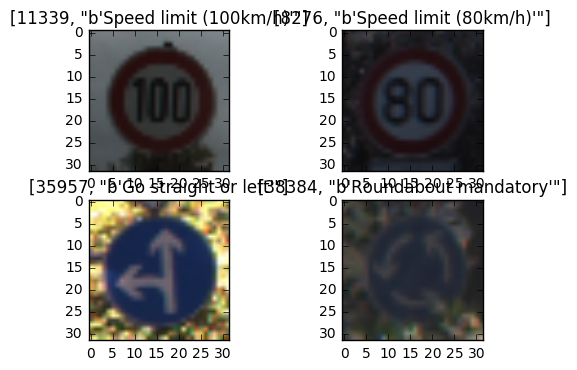

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

# some random data checking
sampleRandomImages = np.random.randint(0,len(X_train),size = 5)
sign_data = np.loadtxt('signnames.csv',dtype=str,delimiter=',',skiprows = 1)
plt.figure(1)
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.imshow(X_train[sampleRandomImages[0]])
ax1.set_title([sampleRandomImages[0], sign_data[int(y_train[sampleRandomImages[0]])][1]])
ax2.imshow(X_train[sampleRandomImages[1]])
ax2.set_title([sampleRandomImages[1], sign_data[int(y_train[sampleRandomImages[1]])][1]])
ax3.imshow(X_train[sampleRandomImages[2]])
ax3.set_title([sampleRandomImages[2], sign_data[int(y_train[sampleRandomImages[2]])][1]])
ax4.imshow(X_train[sampleRandomImages[3]])
ax4.set_title([sampleRandomImages[3], sign_data[int(y_train[sampleRandomImages[3]])][1]])

''' 
val, indices = np.unique(y_train, return_index=True)
for i in range(0,len(indices)):
    plt.figure(i+1)
    plt.imshow(X_train[indices[i]])
'''

911.837209302
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43] [ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]


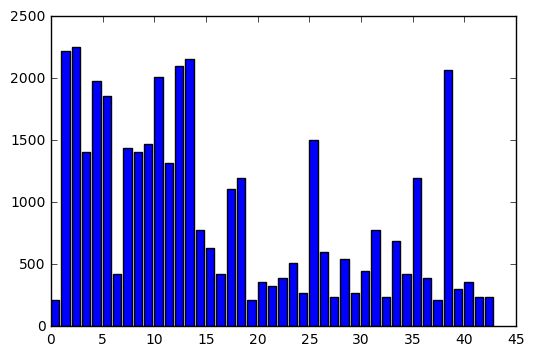

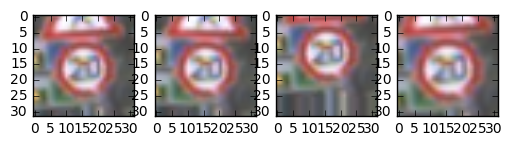

In [4]:
# combined view of data to understand whether we need more data.
# histogram
hist, bin_edges = np.histogram(y_train,bins =range(0,n_classes+1,1))
print(np.mean(hist))
print(bin_edges,hist)
# plot it
plt.bar(bin_edges[:-1],hist)
plt.show

# either rotate / shift or zoom to create more population for lower population category
f2, (img1,img2,img3,img4) = plt.subplots(1,4)
img1.imshow(X_train[0])
from scipy.ndimage import interpolation as imgInterpolation
img2.imshow(imgInterpolation.rotate(X_train[0],-5,reshape=False,mode = 'nearest'))
img3.imshow(imgInterpolation.shift(X_train[0],(-5,0,0),mode = 'nearest'))
from scipy import misc as imgZoom
tImg = imgInterpolation.zoom(X_train[0],(1.125,1.125,1),mode = 'nearest')
img4.imshow(tImg[2:34,2:34,:])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

<Container object of 43 artists>

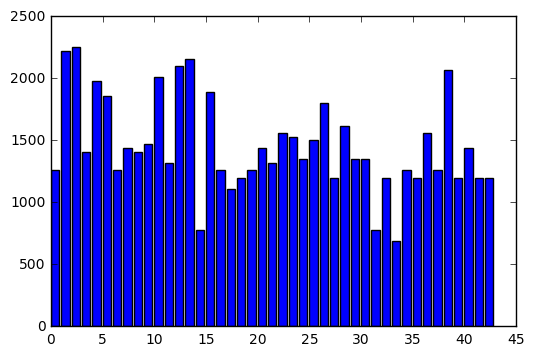

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
### Generate data additional data (OPTIONAL!)
from scipy.ndimage import interpolation as imgInterpolation

def createSample(X_train,y_train,whichLabel,maxSamples):
    #assert(whichLabel>=0 & whichLabel<43)
    X_create = X_train[y_train==whichLabel]
    y_create = y_train[y_train==whichLabel]
    numIterations = maxSamples/len(X_create)
    if numIterations > 1.5: # if i increase this then too many number of samples will be pseudo generated.
        X_add = X_create
        y_add = y_create
        for i in range(int(np.round(numIterations))):
            # Random rotation angle between +/-5 to +/-10
            randomRotation = np.random.randint(-10,-5,size = len(X_create))
            randomRotation = np.append(randomRotation,np.random.randint(5,10,len(X_create)))
            np.random.shuffle(randomRotation)
            randomRotation = randomRotation[0:len(X_create)] # give random rotation (deg)
            # Random shift in pixels between +/-1 to +/-5 pixels
            randomShift = np.random.randint(-5,-1,size = len(X_create))
            randomShift = np.append(randomShift,np.random.randint(1,5,len(X_create)))
            np.random.shuffle(randomShift)
            randomShift = randomShift[0:len(X_create)+1] # give random shift (pixels)
            
            for iImage in range(0,len(X_create)):
                if iImage%2: # if even image then rotate
                    X_add = np.append(X_add,imgInterpolation.rotate(X_create[iImage],randomRotation[iImage],reshape=False,mode = 'nearest').reshape(1,32,32,3),axis=0)
                else: # if odd image then shift
                    X_add = np.append(X_add,imgInterpolation.shift(X_create[iImage],(randomShift[iImage],randomShift[iImage+1],0),mode = 'nearest').reshape(1,32,32,3),axis=0)
                    
                y_add = np.append(y_add,y_create[iImage])
    else: # already too many samples , just use original samples
        X_add = X_create
        y_add = y_create 

    return X_add,y_add

maxSamples = 1000
new_X_train, new_y_train = createSample(X_train,y_train,0,maxSamples)
for iClass in range(1,n_classes):
    X_add,y_add = createSample(X_train,y_train,iClass,maxSamples)
    new_X_train = np.append(new_X_train,X_add,axis=0)
    new_y_train = np.append(new_y_train,y_add,axis=0)

histn, bin_edgesn = np.histogram(new_y_train,bins =range(0,n_classes+1,1))
plt.bar(bin_edgesn[:-1],histn)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I understand that in LeNet as the numbers were black and white color did not matter but in case of traffic signs color does matter and hence I did not apply grayscalling. But I did normalize the images in RGB to be between -127 to 127 so that loss minima can be reached quicker as shown in one of the lectures. 

Also, I found that in the dataset some of the labels were under-represented and that might train the model to skew towards over-represented data. Hence for labels which are in lower number, I applied the rotation and shifting of images to original dataset to increase number of samples. I thought that each labels data should have at least mean number of orignal sample.  No paddding required as the dataset is already suitable for LeNet architecture which I base my new architecture on. Though later, as you can see in my file "AnalysisOfSolution.xls" file, I found out that having additional images does make a prediction of test data a bit worse. Like column J compared to column L in excel file attached.  

In [6]:
### Generate data additional data (OPTIONAL!) - done above
# normalized images
new_X_train = (np.float16(new_X_train)-128)/128

### and shuffle data as by adding samples it became sequential
from sklearn.utils import shuffle
#new_X_train_norm, new_y_train = shuffle(X_train, y_train) # non normalized original data
#new_X_train_norm, new_y_train = shuffle(new_X_train,y_train) # normalized original data
new_X_train_norm, new_y_train = shuffle(new_X_train, new_y_train) # additional normalized data

# split the data into training/validation/testing sets here.
from sklearn.model_selection import train_test_split
X_input, X_validation, y_input, y_validation = train_test_split(new_X_train_norm,new_y_train,test_size = 0.2, random_state = 0)

### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** First of all as the new dataset which I generated were in sequence, I had to randomize (using shuffle) them for selection of training/validation pools. It seems around 70 to 90% of data are normally used as training data. So to start with I selected 80% training data as also suggested in one of the lectures. Also as you can see from column N and V in excel file attached, additional 10% test data does not change results significantly in the network i selected. Yes I generated additional dataset as I explained in previous question. 

In [7]:
### Define your architecture here.
from tensorflow.contrib.layers import flatten
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

def LeNet(x,keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape = (5,5,3,6),mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides = [1,1,1,1], padding = 'VALID') + conv1_b
    
    # TODO: Activation.
    conv1   = tf.nn.relu(conv1)
    conv1   = tf.nn.dropout(conv1, keep_prob)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1   = tf.nn.max_pool(conv1, ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape = (5,5,6,16),mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1,conv2_W,strides = [1,1,1,1], padding = 'VALID') + conv2_b
    
    # TODO: Activation.
    conv2   = tf.nn.relu(conv2)    
    conv2   = tf.nn.dropout(conv2, keep_prob)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2   = tf.nn.max_pool(conv2,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'VALID')
    '''  
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0     = flatten(conv2)
    
    # Add an FC layer
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 200.
    fc0_W   = tf.Variable(tf.truncated_normal(shape = (400,200),mean = mu, stddev = sigma))
    fc0_b   = tf.Variable(tf.zeros(200))
    fc0     = tf.add(tf.matmul(fc0,fc0_W),fc0_b)
    
    # TODO: Activation and dropout
    fc0     = tf.nn.relu(fc0)
    fc0     = tf.nn.dropout(fc0, keep_prob)
    # End of addition of an FC layer
    
    # TODO: Layer 3: Fully Connected. Input = 200. Output = 120.
    fc1_W   = tf.Variable(tf.truncated_normal(shape = (200,120),mean = mu, stddev = sigma))
    fc1_b   = tf.Variable(tf.zeros(120))
    fc1     = tf.add(tf.matmul(fc0,fc1_W),fc1_b)
    
    # TODO: Activation and dropout
    fc1     = tf.nn.relu(fc1)
    #fc1     = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W   = tf.Variable(tf.truncated_normal(shape = (120,84),mean = mu, stddev = sigma))
    fc2_b   = tf.Variable(tf.zeros(84))
    fc2     = tf.add(tf.matmul(fc1,fc2_W),fc2_b)
    
    # TODO: Activation.
    fc2     = tf.nn.relu(fc2)
    #fc2     = tf.nn.dropout(fc2, keep_prob)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W   = tf.Variable(tf.truncated_normal(shape = (84,43),mean = mu, stddev = sigma))
    fc3_b   = tf.Variable(tf.zeros(43))
    logits  = tf.add(tf.matmul(fc2,fc3_W),fc3_b)
    ''' 
    # Addition of a convolutional layer
    # TODO: Layer 3: Convolutional. Output = 3x3x32.
    conv3_W = tf.Variable(tf.truncated_normal(shape = (3,3,16,32),mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(32))
    conv3   = tf.nn.conv2d(conv2,conv3_W,strides = [1,1,1,1], padding = 'VALID') + conv3_b
    
    # TODO: Activation.
    conv3   = tf.nn.relu(conv3)    
    #conv3   = tf.nn.dropout(conv3, keep_prob)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    #conv2   = tf.nn.max_pool(conv2,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'VALID')

    # TODO: Flatten. Input = 3x3x32. Output = 288.
    fc0     = flatten(conv3)

    # Add an FC layer
    # TODO: Layer 4: Fully Connected. Input = 288. Output = 144.
    fc0_W   = tf.Variable(tf.truncated_normal(shape = (288,144),mean = mu, stddev = sigma))
    fc0_b   = tf.Variable(tf.zeros(144))
    fc0     = tf.add(tf.matmul(fc0,fc0_W),fc0_b)
    
    # TODO: Activation and dropout
    fc0     = tf.nn.relu(fc0)
    fc0     = tf.nn.dropout(fc0, keep_prob)
    # End of addition of an FC layer

    # TODO: Layer 5: Fully Connected. Input = 144. Output = 100.
    fc1_W   = tf.Variable(tf.truncated_normal(shape = (144,100),mean = mu, stddev = sigma))
    fc1_b   = tf.Variable(tf.zeros(100))
    fc1     = tf.add(tf.matmul(fc0,fc1_W),fc1_b)
    
    # TODO: Activation and dropout
    fc1     = tf.nn.relu(fc1)
    fc1     = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 6: Fully Connected. Input = 100. Output = 84.
    fc2_W   = tf.Variable(tf.truncated_normal(shape = (100,84),mean = mu, stddev = sigma))
    fc2_b   = tf.Variable(tf.zeros(84))
    fc2     = tf.add(tf.matmul(fc1,fc2_W),fc2_b)
    
    # TODO: Activation.
    fc2     = tf.nn.relu(fc2)
    #fc2     = tf.nn.dropout(fc2, keep_prob)
    
    # TODO: Layer 7: Fully Connected. Input = 84. Output = 43.
    fc3_W   = tf.Variable(tf.truncated_normal(shape = (84,43),mean = mu, stddev = sigma))
    fc3_b   = tf.Variable(tf.zeros(43))
    logits  = tf.add(tf.matmul(fc2,fc3_W),fc3_b)

    return logits
### Feel free to use as many code cells as needed.
### Feel free to use as many code cells as needed.

In [8]:
# Training and Evaluation using training and validation data in Tensorflow

# Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, 43)

# Training pipeline
rate = 0.001

logits = LeNet(x,keep_prob)

# Training section
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model evaluate
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I started with using LeNet as shown in lectures. But the results were not that great in test data. Then i added dropout as recommended by my mentor. But I felt based on results that there is a need for more convolution layer. Then I added an extra fully connected layer too and found out that addition of fully connected layer helps reach >90% accuracy faster in training data then addition of convolution layer but for higher epochs results seem similar. I still feel that there is quite a lot of possibility to improve model looking at results. Also adding dropouts leads to reach higher accuracy a bit slower but makes for better results for longer epochs.

In [9]:
# Train the model
with tf.Session() as sess:
    #sess.run(tf.reset_default_graph())
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_input)
    
    print("Training...",EPOCHS)
    print()
    for i in range(EPOCHS):
        X_input, y_input = shuffle(X_input, y_input)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_input[offset:end], y_input[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try: 
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, '.')
    print("Model saved")
### Feel free to use as many code cells as needed.

Training... 50

EPOCH 1 ...
Validation Accuracy = 0.345

EPOCH 2 ...
Validation Accuracy = 0.555

EPOCH 3 ...
Validation Accuracy = 0.666

EPOCH 4 ...
Validation Accuracy = 0.731

EPOCH 5 ...
Validation Accuracy = 0.779

EPOCH 6 ...
Validation Accuracy = 0.789

EPOCH 7 ...
Validation Accuracy = 0.814

EPOCH 8 ...
Validation Accuracy = 0.826

EPOCH 9 ...
Validation Accuracy = 0.863

EPOCH 10 ...
Validation Accuracy = 0.873

EPOCH 11 ...
Validation Accuracy = 0.885

EPOCH 12 ...
Validation Accuracy = 0.891

EPOCH 13 ...
Validation Accuracy = 0.904

EPOCH 14 ...
Validation Accuracy = 0.889

EPOCH 15 ...
Validation Accuracy = 0.910

EPOCH 16 ...
Validation Accuracy = 0.923

EPOCH 17 ...
Validation Accuracy = 0.921

EPOCH 18 ...
Validation Accuracy = 0.925

EPOCH 19 ...
Validation Accuracy = 0.925

EPOCH 20 ...
Validation Accuracy = 0.926

EPOCH 21 ...
Validation Accuracy = 0.936

EPOCH 22 ...
Validation Accuracy = 0.933

EPOCH 23 ...
Validation Accuracy = 0.932

EPOCH 24 ...
Validation Acc

In [10]:
### Load the images and plot them here.
### Run the predictions here.
### Test your model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint("."))
    #saver.restore(sess,".")
    new_X_test = (np.float32(X_test)-128)/128
    test_accuracy = evaluate(new_X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
### Feel free to use as many code cells as needed.

Test Accuracy = 0.918


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** First I had only 10 epochs to understand within these number of epochs which method works best but it was taking too much time in my PC and hence I started using AWS. I increased EPOCH to 25 and then to 50 as it started giving better predictions. Still I felt from the results that increase in accuracy between 10 to 25 is more than 25 to 50. Also there were some studies done by me with varying size of epoch/batch_size and other hyper parameters as shown in excel file to understand their effect on results of test data. I did not change Adam optimizer which is part of LeNet in interest of time.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I used following steps for my final architecture: 1) LeNet architecture, 2) Add dropout in Conv layer, 3) Add dropout in FC layer, 4) Increase a Conv Layer, 5) Increase a FC layer, 6) Increase Epochs. I tried to discuss the reasoning in Q3 and Q4 and also gave references from the attached excel file which are outcome from each run with changes in hyperparameters.

One thing which i am trying to find out currently is why addition of input data(to make all labels of uniform size in training data) makes my deep learning model have a bit worse results. I believe it is to do with my data augumentation technique of shifting/rotating data.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(6, 32, 32, 3)


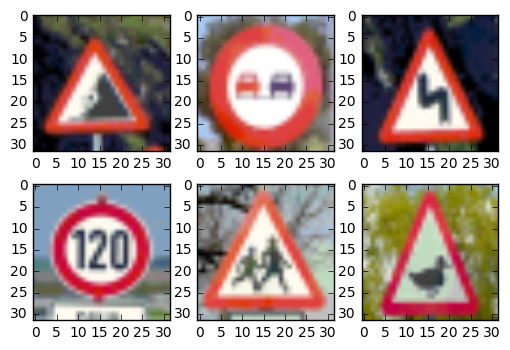

In [11]:
### Load the images and plot them here.
#import scipy.ndimage as snd # - does not work as there is a conflict with pillow vs PIL , both should not installed at same time
#imageResized = (cv2.resize(snd.imread(fnames[0]),(32,32),interpolation=cv2.INTER_AREA)).reshape(1,32,32,3)
import glob,cv2
fnames = glob.glob('*.bmp')
tempImage = cv2.imread(fnames[0])
imageResized = cv2.resize(tempImage[:,:,::-1],(32,32),interpolation=cv2.INTER_AREA).reshape(1,32,32,3)
for file in range(1,len(fnames)):
    #image = snd.imread(fnames[file])
    tempImage = cv2.imread(fnames[file])
    imageResized = np.append(imageResized,(cv2.resize(tempImage[:,:,::-1],(32,32),interpolation= cv2.INTER_AREA)).reshape(1,32,32,3),axis=0)
### Feel free to use as many code cells as needed.
print(imageResized.shape)
f, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
ax1.imshow(imageResized[0])
ax2.imshow(imageResized[1])
ax3.imshow(imageResized[2])
ax4.imshow(imageResized[3])
ax5.imshow(imageResized[4])
ax6.imshow(imageResized[5])
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** 1st image and 6th image are not in dataset.
2nd image is having thicker red circle outline then normal signs.
3rd to 5th image are similar as found in training dataset and for conformity of model accuracy.

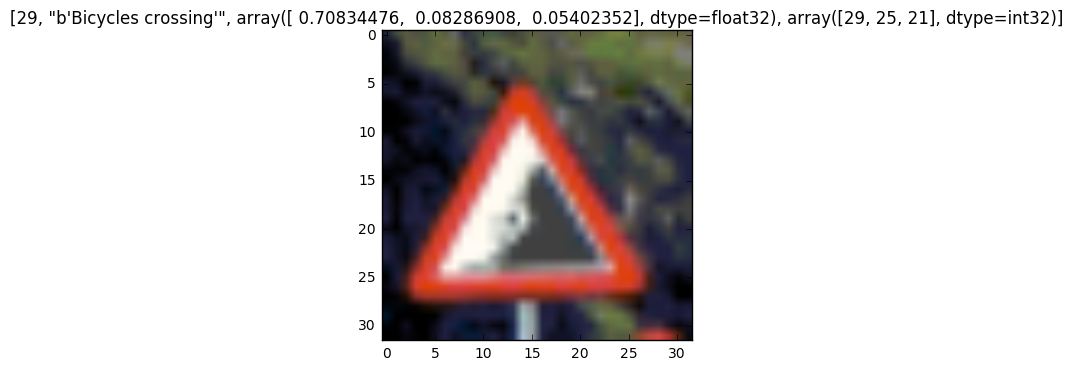

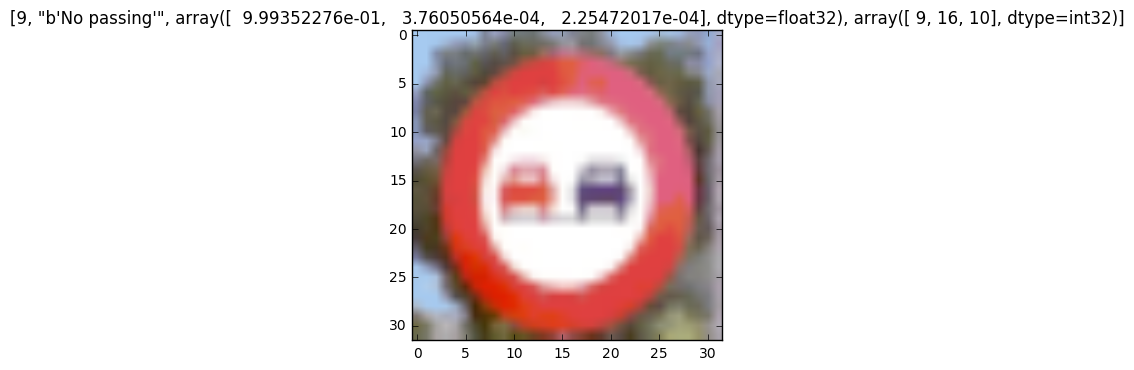

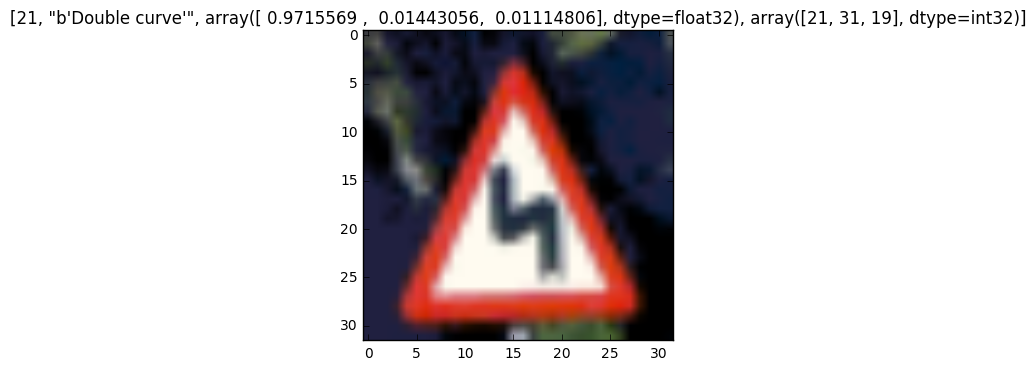

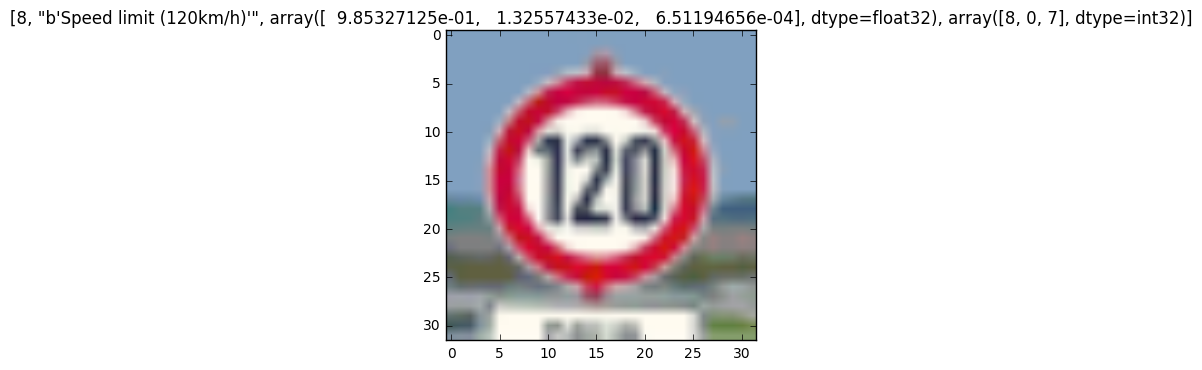

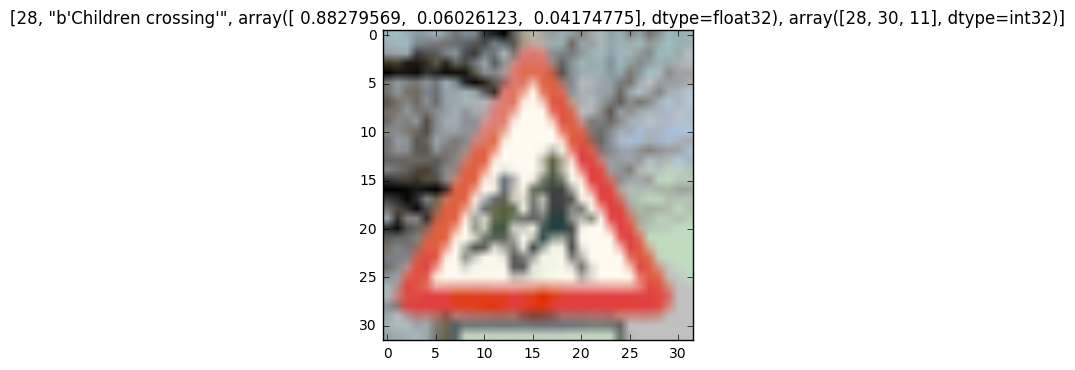

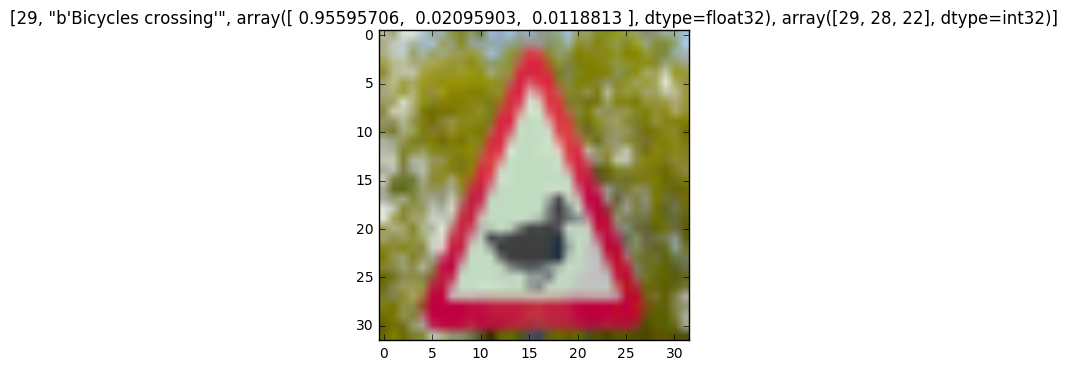

In [22]:
### Run the predictions here.
prediction = tf.arg_max(logits,1)
probabilities = logits

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    new_X_test = (np.float32(imageResized)-128)/128
    saver.restore(sess, tf.train.latest_checkpoint("."))
    #print("predictions",prediction.eval(feed_dict = {x:new_X_test, keep_prob:1}))
    #print("probabilities",sess.run(tf.nn.top_k(tf.nn.softmax(probabilities.eval(feed_dict={x:new_X_test,keep_prob:1})),k=3)))
    answers = prediction.eval(feed_dict = {x:new_X_test, keep_prob:1})
    probs   = sess.run(tf.nn.top_k(tf.nn.softmax(probabilities.eval(feed_dict={x:new_X_test,keep_prob:1})),k=3))
    for i in range(len(answers)):
        plt.figure(i)
        plt.imshow(imageResized[i])
        plt.title([answers[i], sign_data[answers[i]][1],probs.values[i],probs.indices[i]])
        
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** Predictions of 1st image I believe gives reasonable prediction as second probablity as road work which looks similar to falling rocks. 2nd to 5th image have results predicted correctly by model (~90%). 6th image is completely blown away, I expected it to be more near to children crossing.

In [13]:
### Visualize the softmax probabilities here. -- Done in above step as title of images

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** Done above with plot titles. 2nd to 5th image were spot on i.e. > 90% probability correct prediction. But 1st and 6th image are dodgy predictions. Need to improve the model probably with more bicycle crossing sign data as its one of the lowest population in training data.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.